# Import

In [49]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

def d(*obj):
    for o in obj:
        display(o)

def p(*obj):
    for o in obj:
        print(o)

def _np(ls):
    return np.array(ls)

# Config

In [50]:
tickers = ['USO', 
           'TSLA', 'NIO', 'LI', 'XPEV', 
           'CCL', 'RCL', 'NCLH', 
           'DAL', 'LUV', 'UAL', 'AAL', 'ALK', 'CPA',
           'ODFL', 'XPO', 'KNX', 'SNDR', 'WERN', 'RXO',
           'XLE', 'XOM', 'CVX', 'BP', 'PBR', 'E', 'CVE']
start = '2022-01-02'
end = '2023-12-07'
ticker = 'CCL'

df_raw = pd.read_csv('Data.csv')
df_raw = df_raw.set_index('Time')
df_raw.index = pd.to_datetime(df_raw.index)
df_raw = df_raw.drop(['Date', 'Adj Close'], axis=1)

df_oil = df_raw.loc[df_raw['Ticker']=='USO'].drop(['Ticker'], axis=1).loc[start:end]

# Featuring

In [51]:
import sys
sys.path.append('../../../qwok/')
from signal_oscillator import Price_Oscillator_Signal
from visualization import Visualization as Vis

In [52]:
def clf_pn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [53]:
df = df_raw.loc[df_raw['Ticker']==ticker].drop(['Ticker'], axis=1).loc[start:end]

## Signals - Oil Price Extrema

In [54]:
oilExtrema_signals_obj = Price_Oscillator_Signal(df['Close'], df_oil['High'])
signals_extrema = oilExtrema_signals_obj.getSignals_OscillatorExtrema() * -1

In [55]:
oilExtrema_bt_obj = Vis(df['Close'], signals_extrema, extend_position=True, asset_name=ticker)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


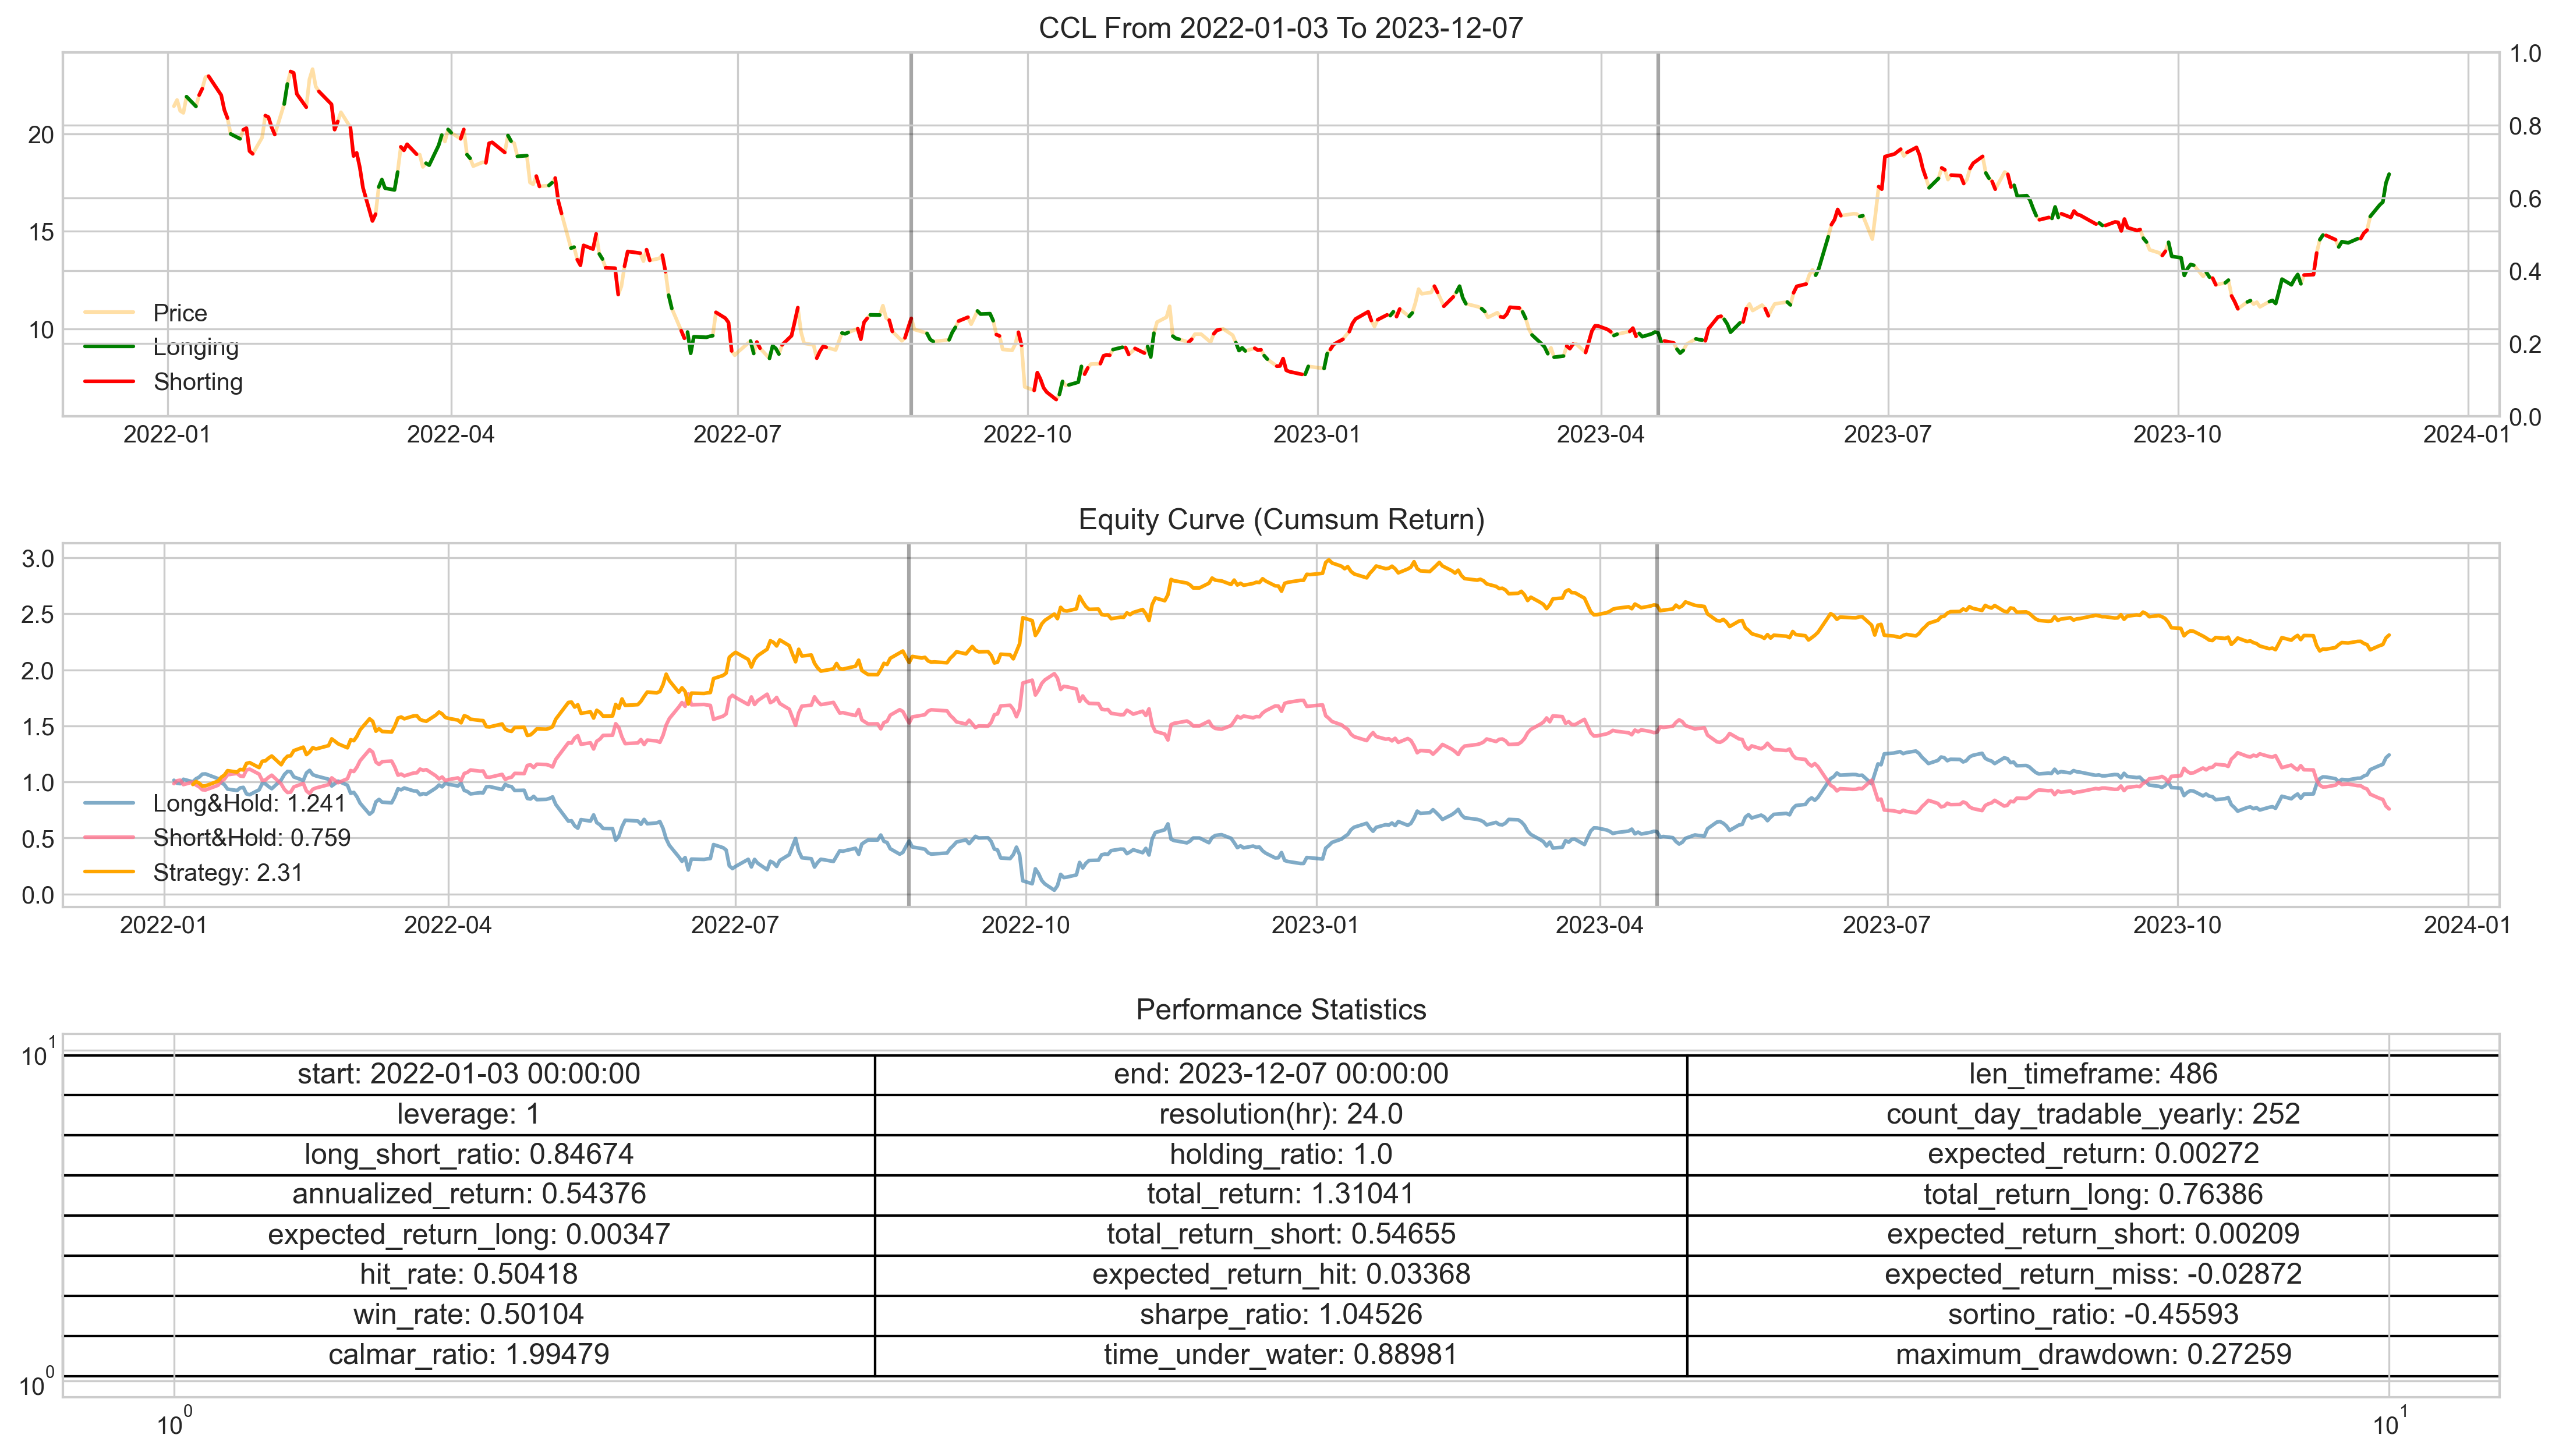

In [56]:
oilExtrema_bt_obj.plot_general(config_position={'plot':False})

## Singals - Oil Close Price Change

In [57]:
signals_oilClose = df_oil['Close'].pct_change().apply(lambda x: clf_pn(x)) * -1
oilClose_bt_obj = Vis(df['Close'], signals_oilClose, extend_position=False, asset_name=ticker)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


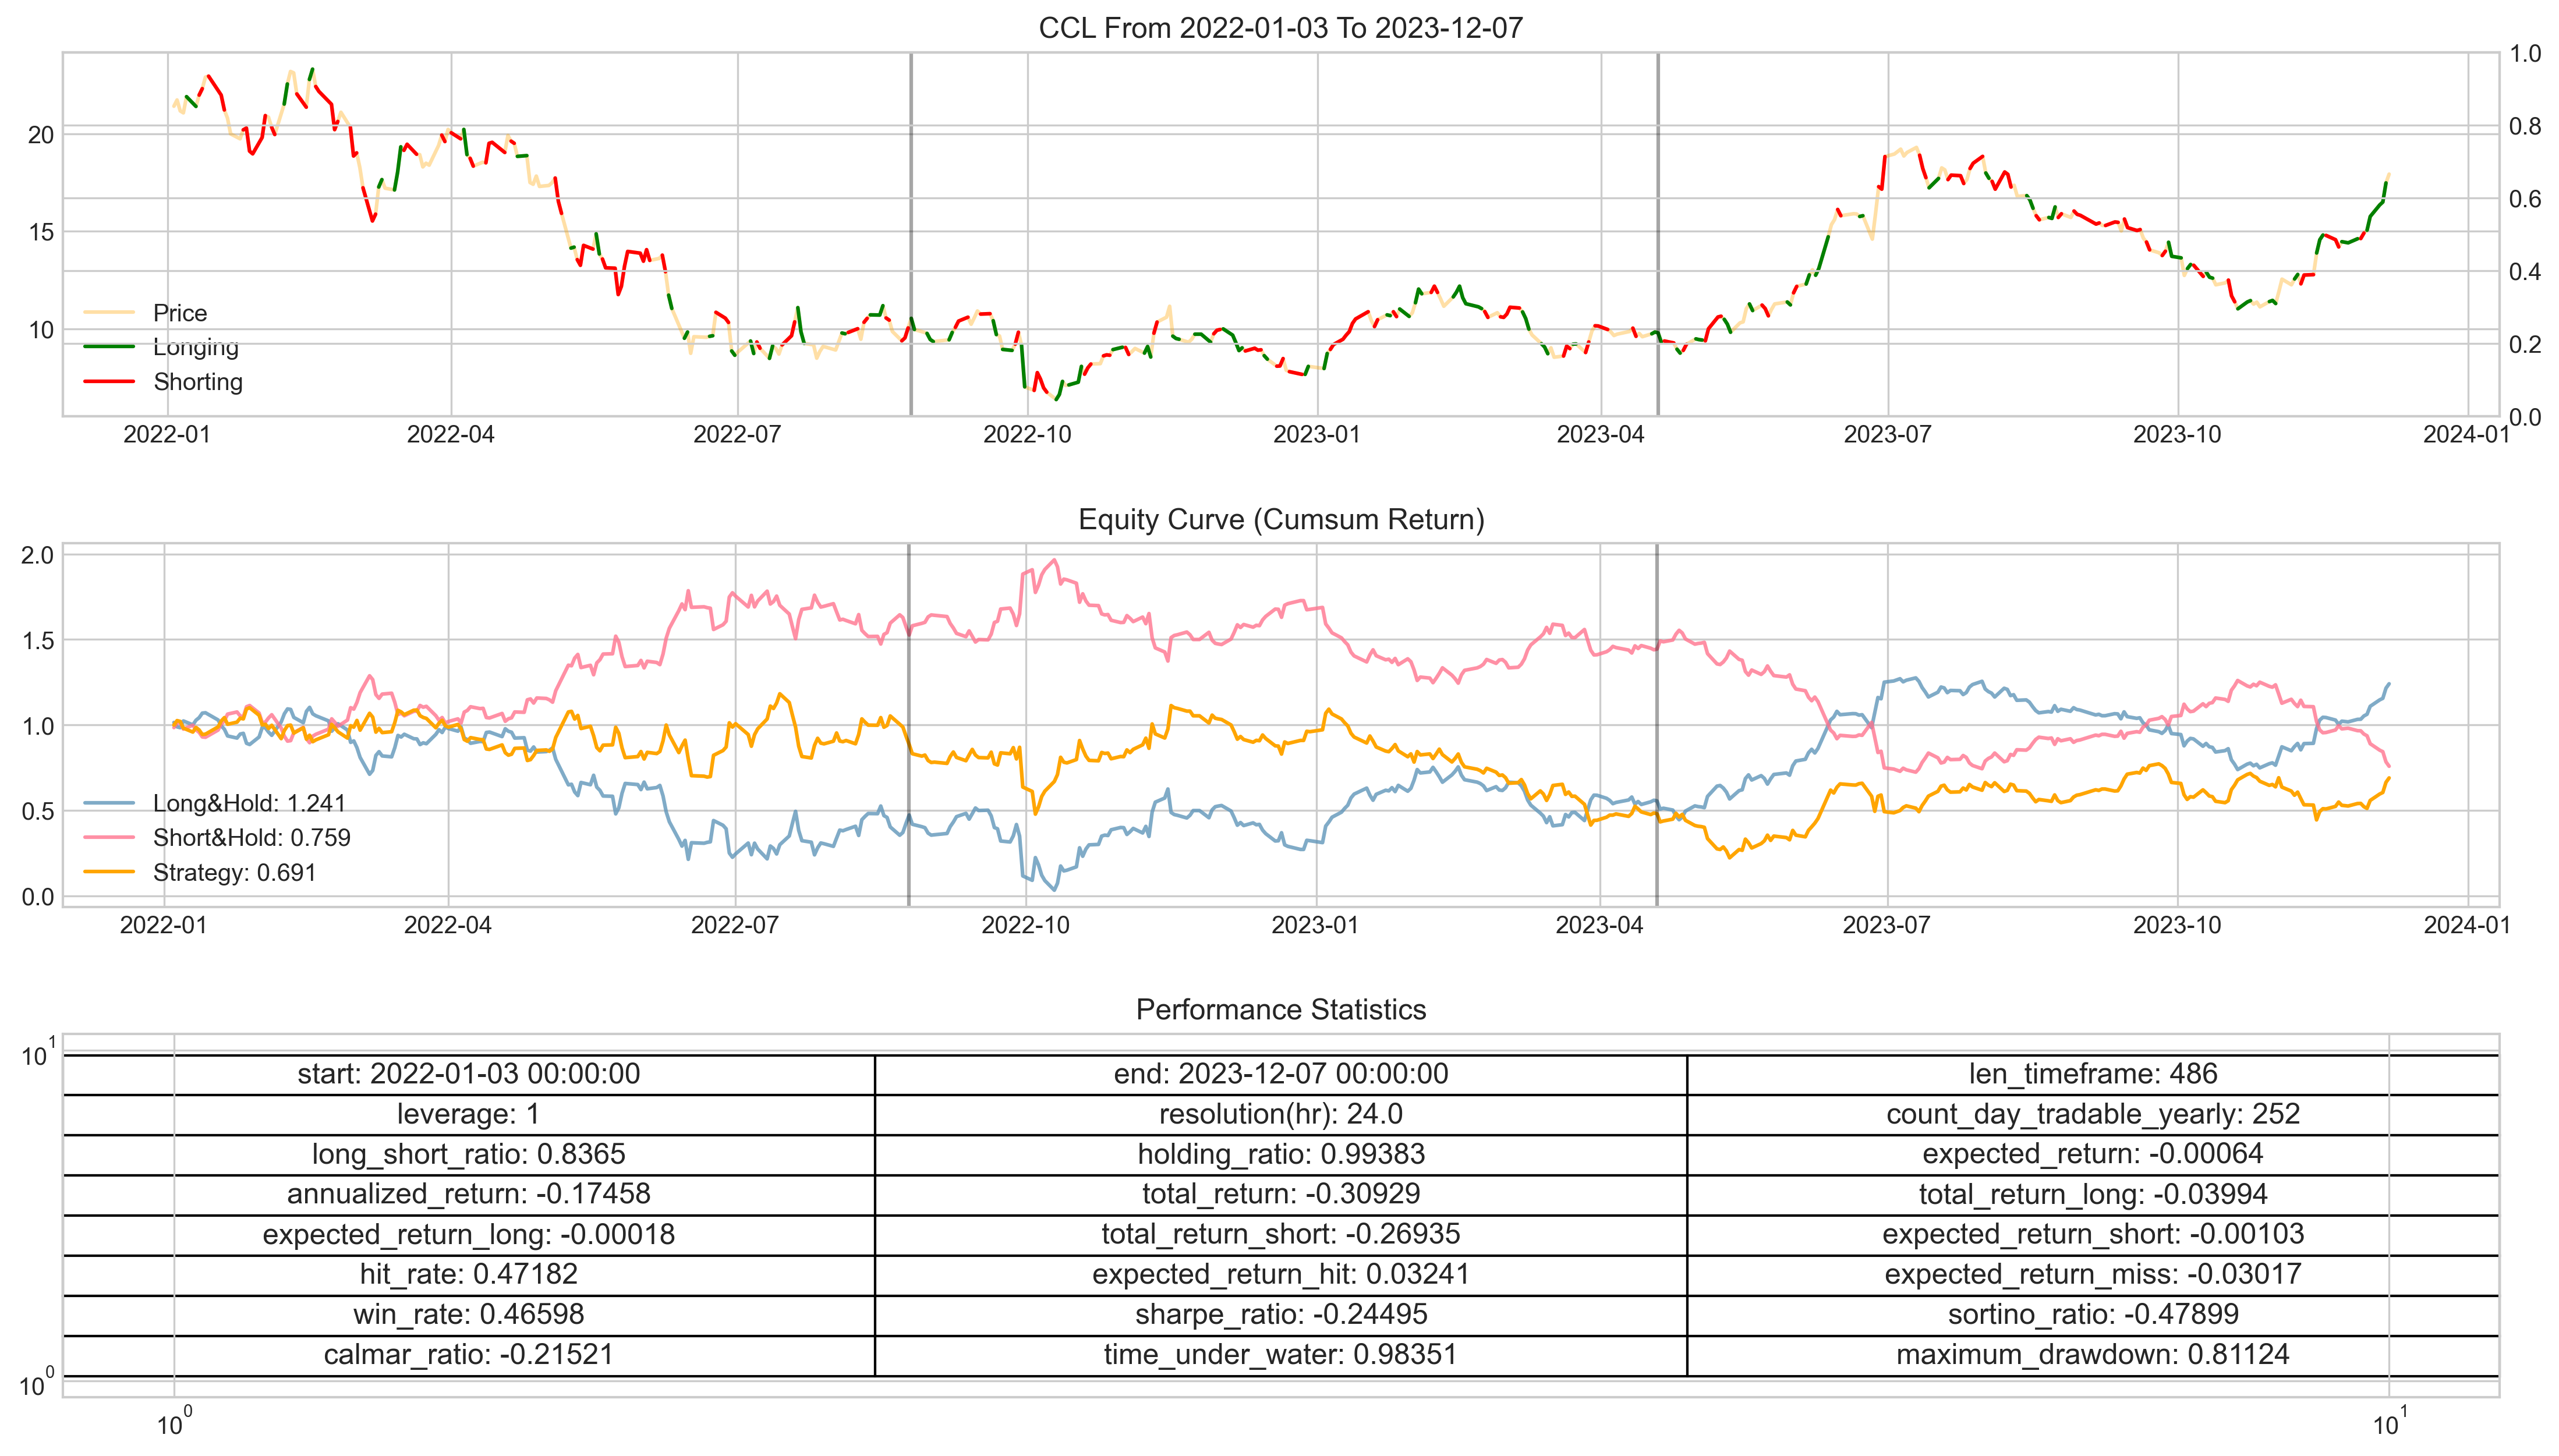

In [58]:
oilClose_bt_obj.plot_general(config_position={'plot':False})

## Signals - Oil Open Price Gap

In [59]:
df_oil['Gap'] = df_oil['Open'] - df_oil['Close'].shift(1)

In [60]:
signals_oilGap = df_oil['Gap'].apply(lambda x: clf_pn(x))
signals_oilGap = signals_oilGap.shift(-1) * -1
oilGap_bt_obj = Vis(df['Close'], signals_oilGap, open=df['Open'], method_position=1, extend_position=False, asset_name=ticker)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


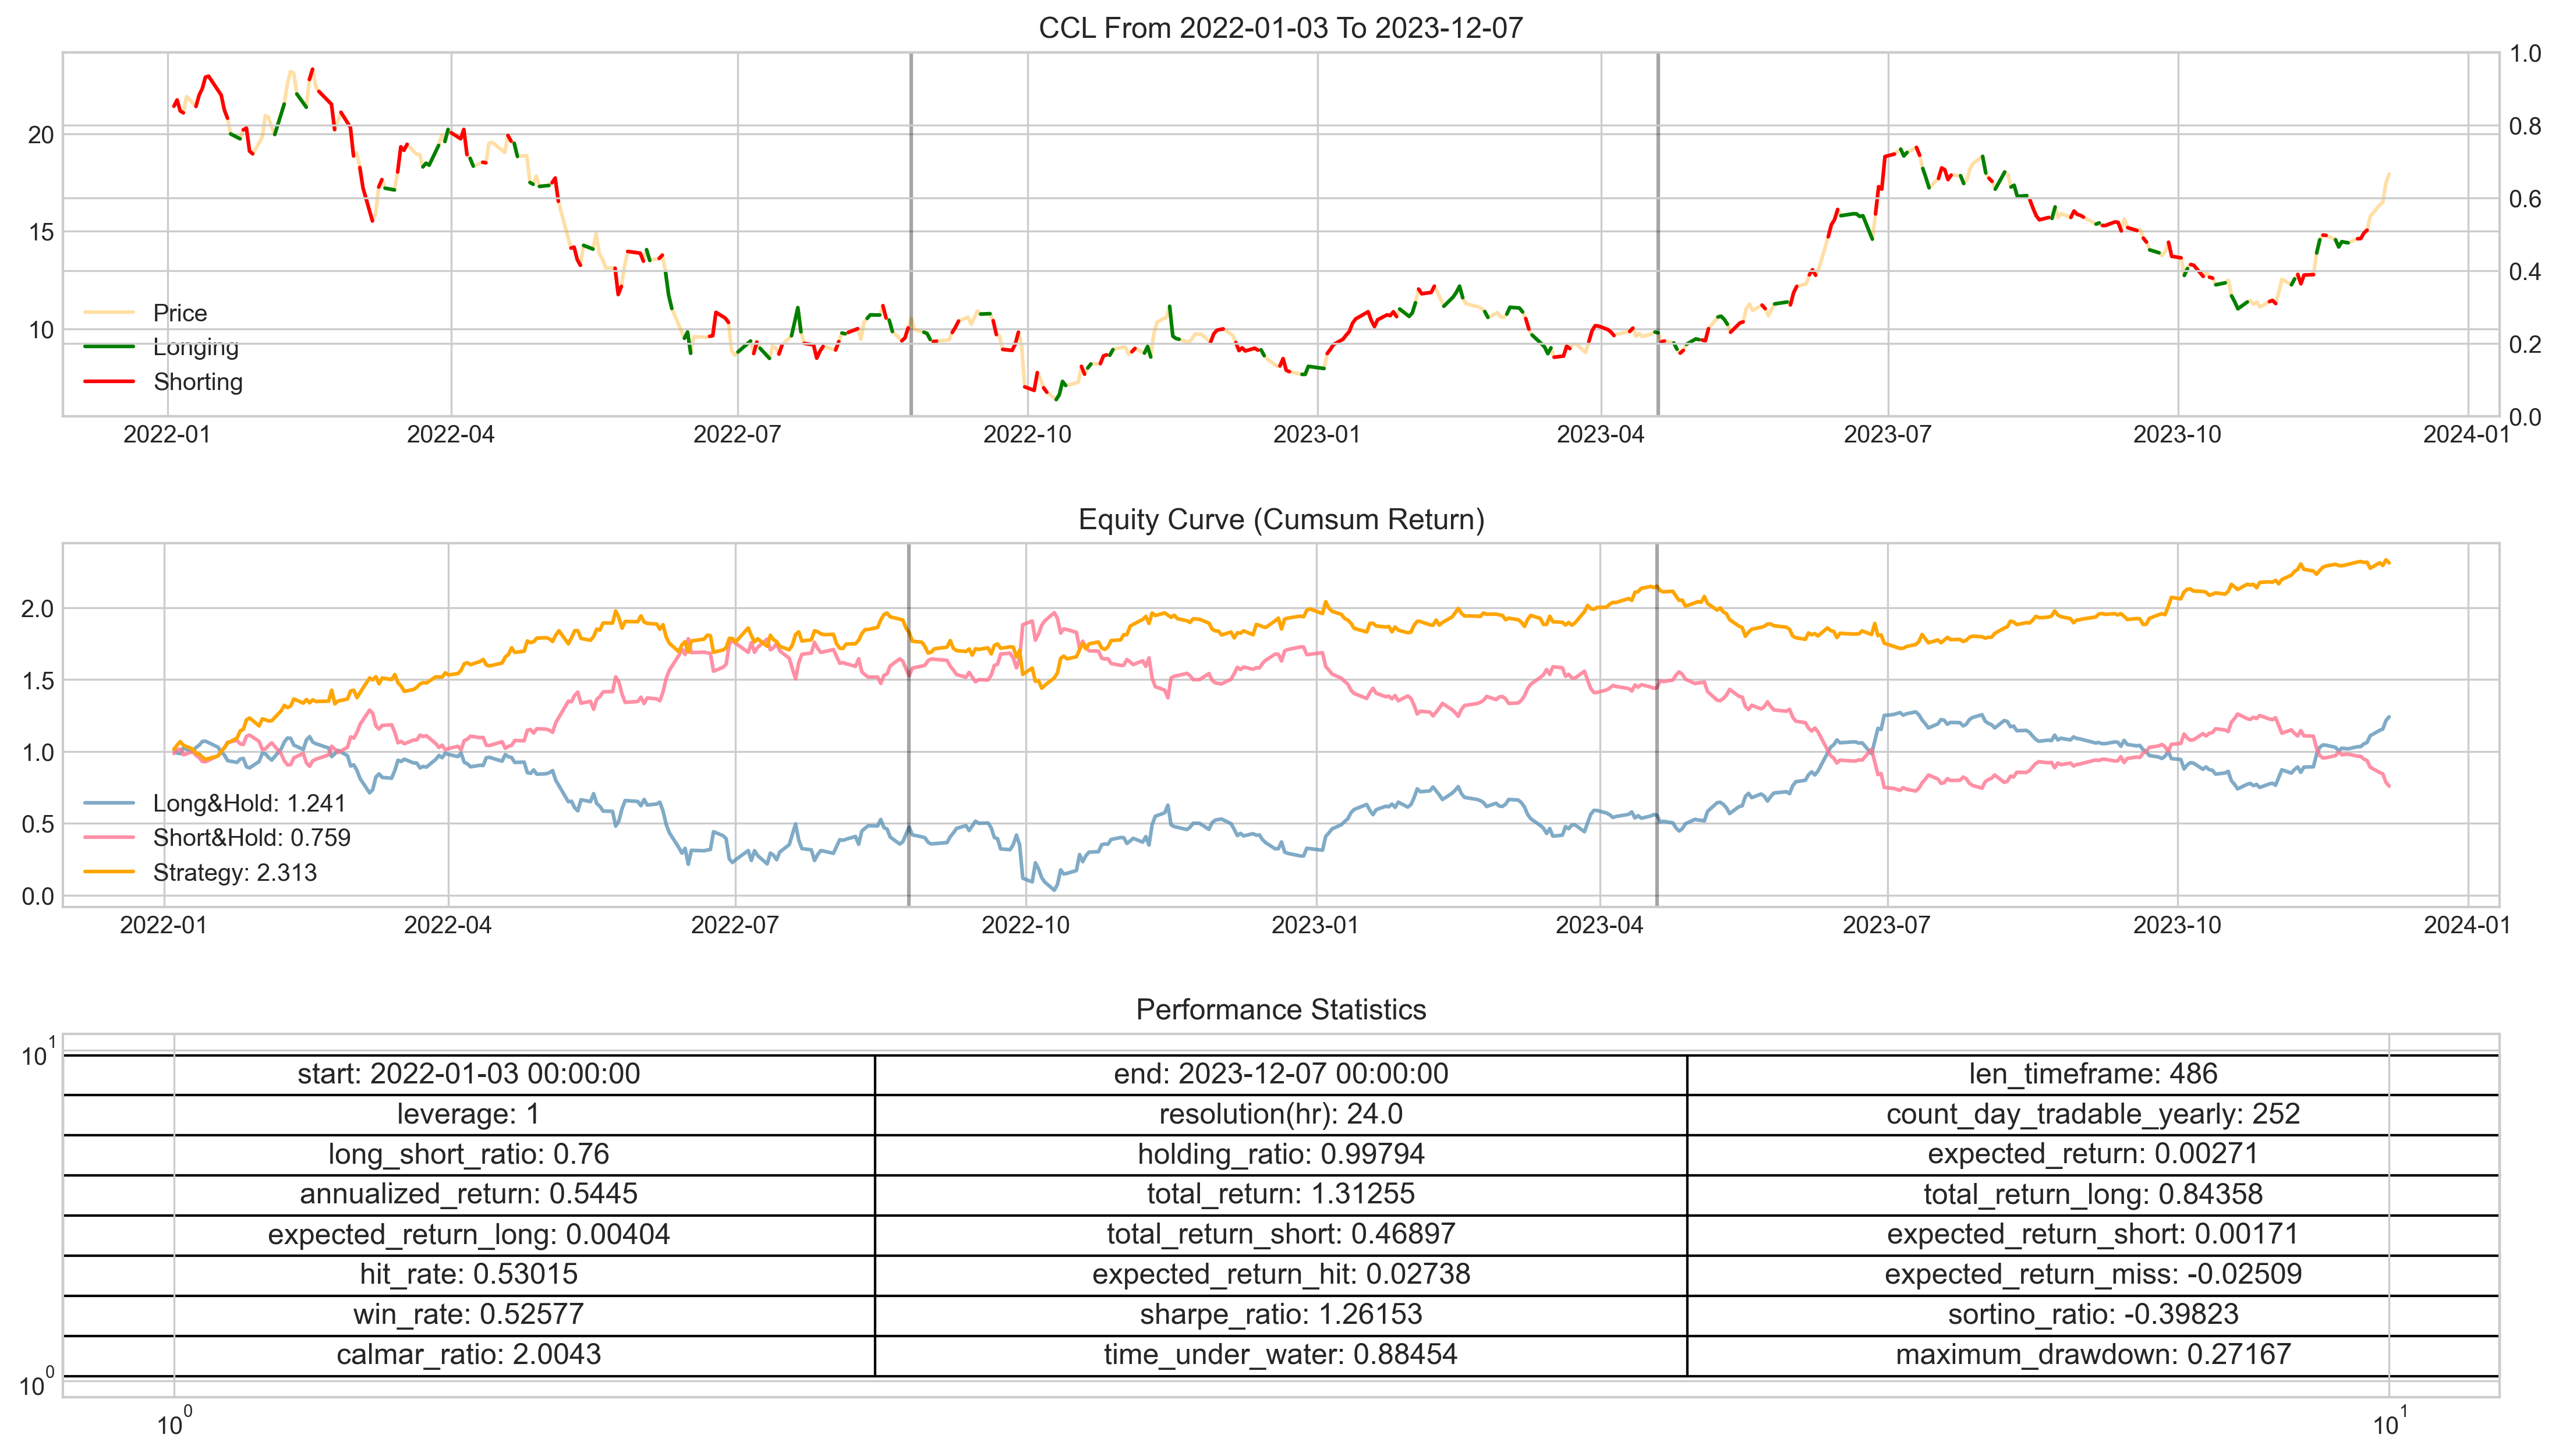

In [61]:
oilGap_bt_obj.plot_general(config_position={'plot':False})

## Signals - Oil SMA(Close)

In [62]:
window_sma = 10
df_oil[f'SMA{window_sma} (Close)'] = df_oil['Close'].rolling(window_sma).mean()

In [63]:
signals_oilSMAClose = (df_oil['Close'] > df_oil[f'SMA{window_sma} (Close)']).apply(lambda x: 1 if x else -1) * -1
oilSMAClose_bt_obj = Vis(df['Close'], signals_oilSMAClose, extend_position=False, asset_name=ticker)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


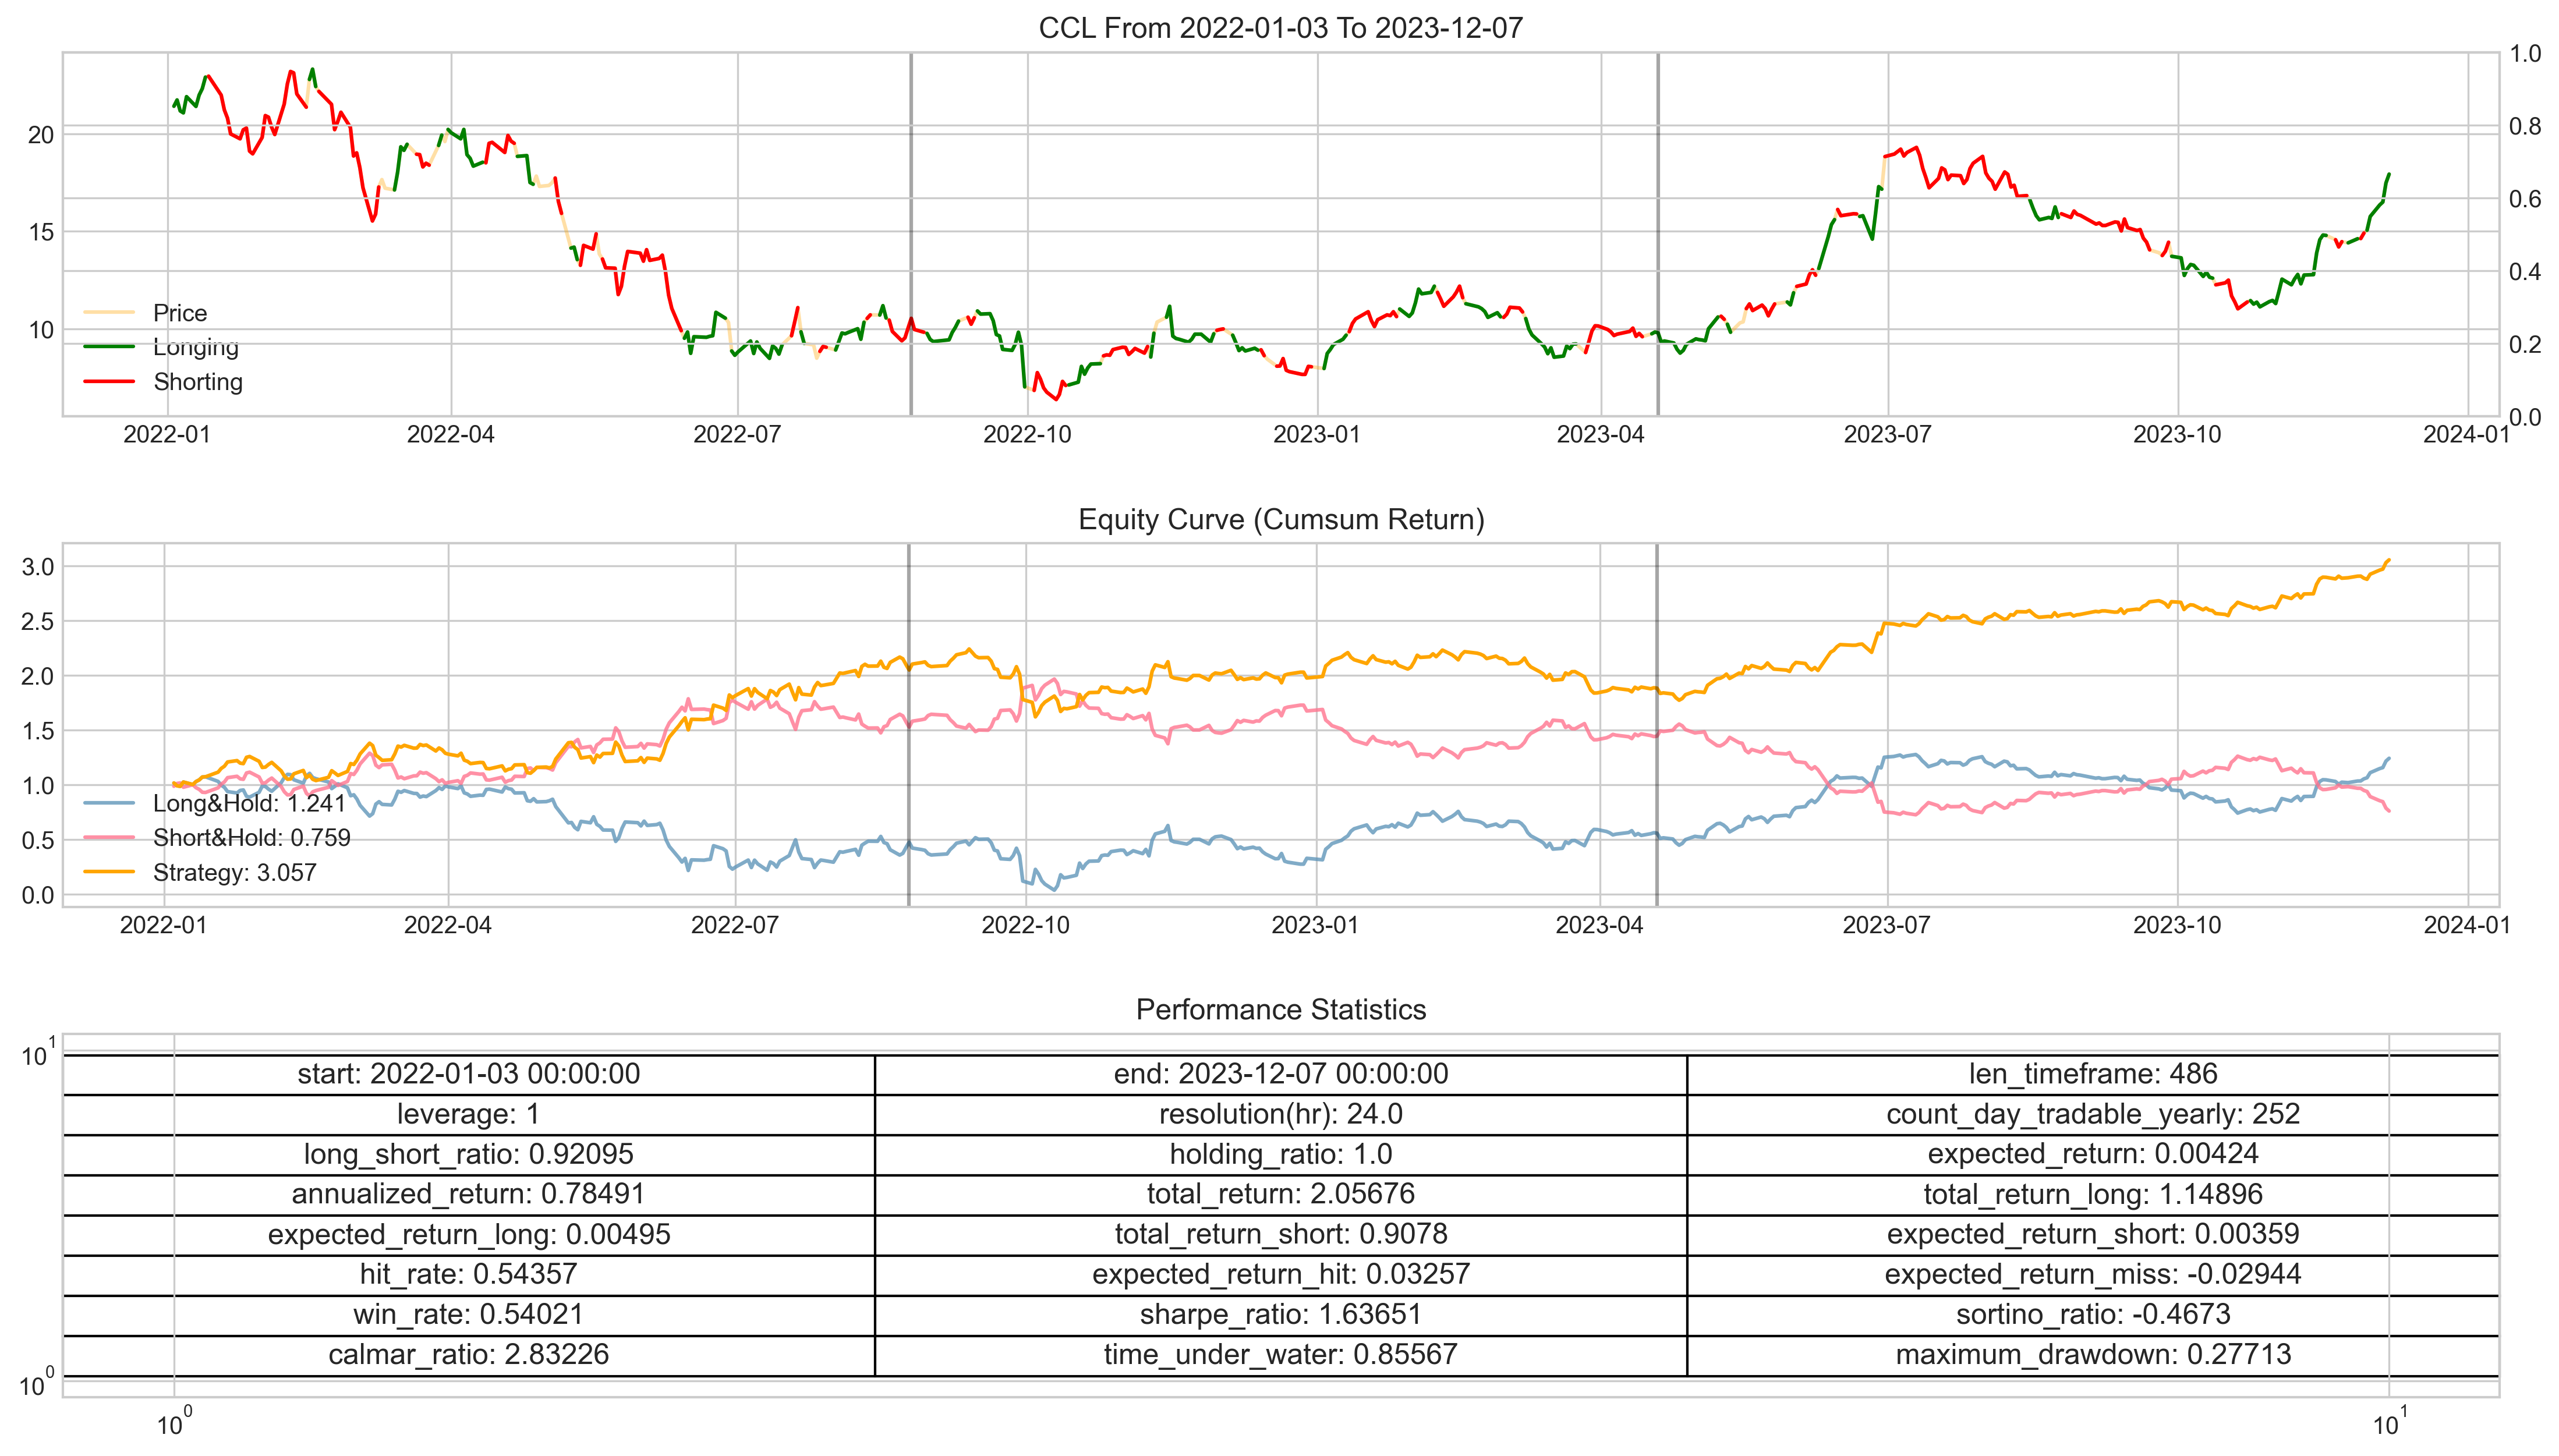

In [64]:
oilSMAClose_bt_obj.plot_general(config_position={'plot':False})

## Signals - Oil SMA(Open)

In [65]:
window_sma = 10
df_oil[f'SMA{window_sma} (Open)'] = df_oil['Open'].rolling(window_sma).mean()

In [66]:
singals_oilSMAOpen = (df_oil['Open'] > df_oil[f'SMA{window_sma} (Open)']).apply(lambda x: 1 if x else -1)
singals_oilSMAOpen = singals_oilSMAOpen.shift(-1) * -1
oilSMAOpen_bt_obj = Vis(df['Close'], singals_oilSMAOpen, open=df['Open'], method_position=1, extend_position=False, asset_name=ticker)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


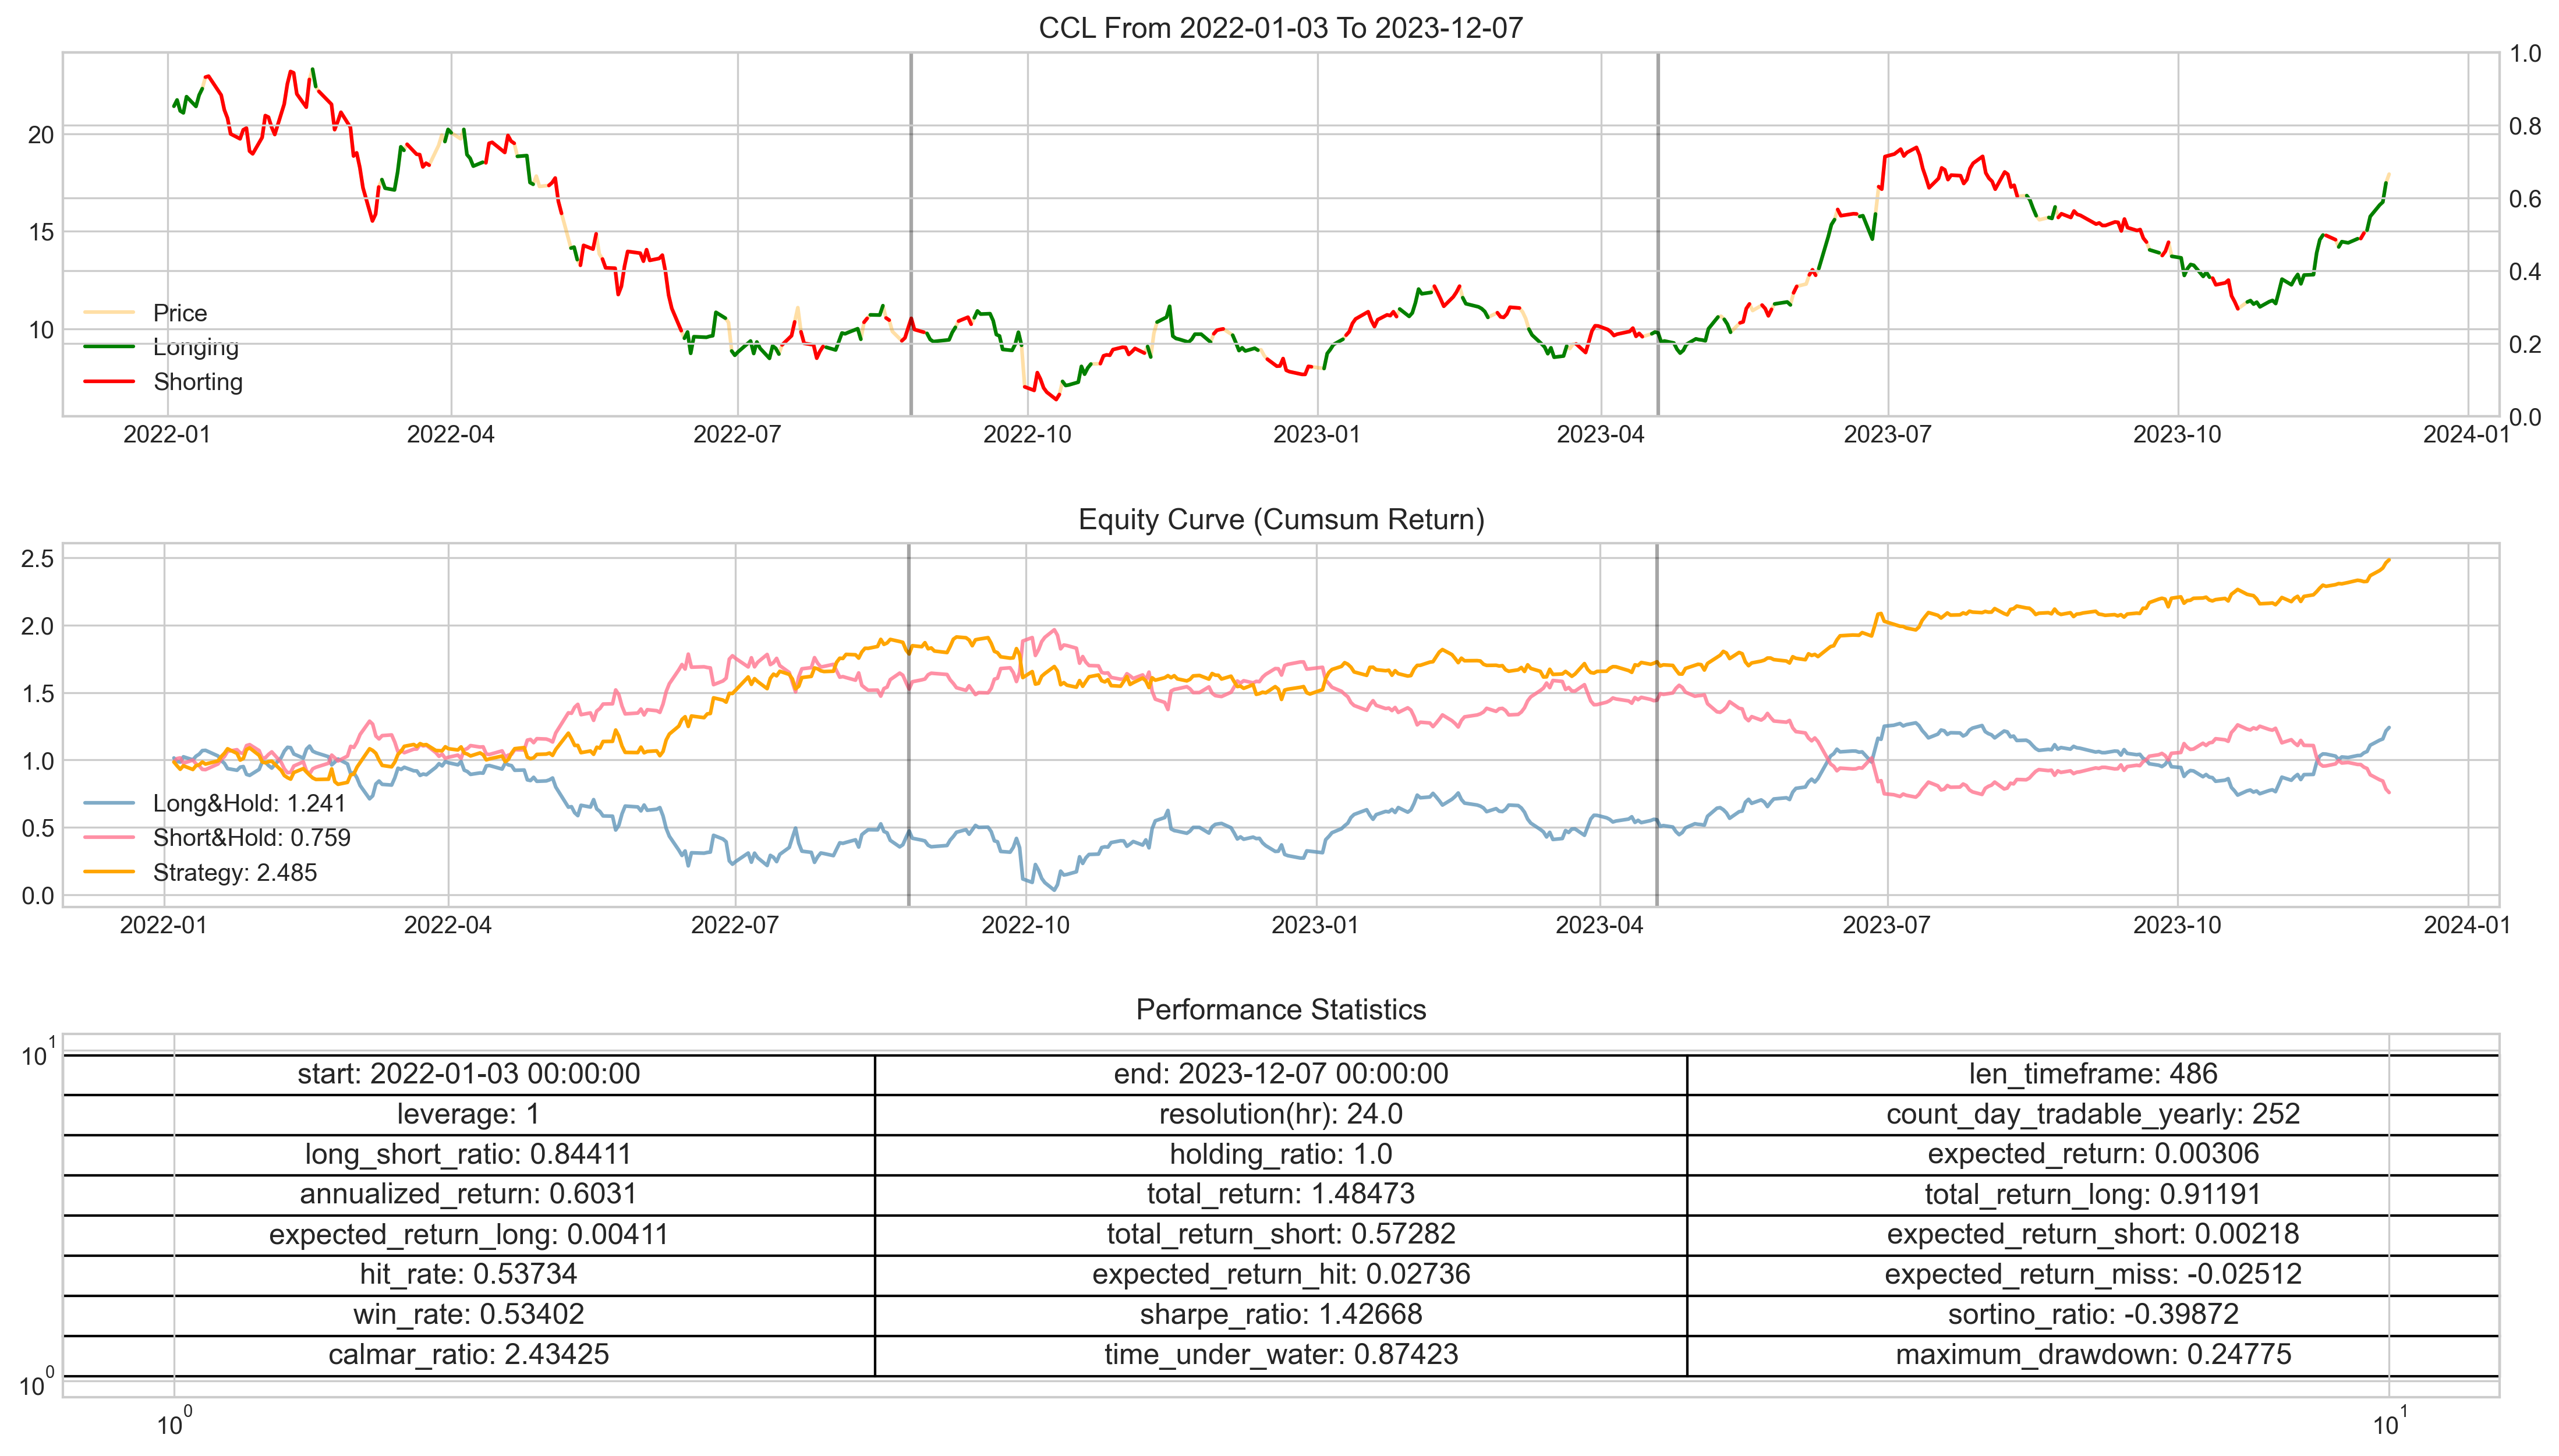

In [67]:
oilSMAOpen_bt_obj.plot_general(config_position={'plot':False})

# QC

In [68]:
d(oilExtrema_bt_obj.method_position)
pd.concat([oilExtrema_bt_obj.df_bt, df_oil['High']], axis=1).tail(20)

0

Open  Close    Return  Position       PnL       High
2023-11-09 00:00:00   NaN  12.31 -0.037529       1.0 -0.037529  71.660004
2023-11-10 00:00:00   NaN  12.76  0.036556      -1.0  0.036556  72.220001
2023-11-13 00:00:00   NaN  12.78  0.001567      -1.0 -0.001567  72.959999
2023-11-14 00:00:00   NaN  13.89  0.086855      -1.0 -0.086855  74.040001
2023-11-15 00:00:00   NaN  14.57  0.048956       1.0 -0.048956  72.379997
2023-11-16 00:00:00   NaN  14.81  0.016472       1.0  0.016472  69.709999
2023-11-17 00:00:00   NaN  14.79 -0.001350      -1.0 -0.001350  70.949997
2023-11-20 00:00:00   NaN  14.57 -0.014875      -1.0  0.014875  73.070000
2023-11-21 00:00:00   NaN  14.20 -0.025395       1.0  0.025395  72.589996
2023-11-22 00:00:00   NaN  14.47  0.019014       1.0  0.019014  71.900002
2023-11-24 00:00:00   NaN  14.41 -0.004147       1.0 -0.004147  71.860001
2023-11-27 00:00:00   NaN  14.62  0.014573       1.0  0.014573  71.089996
2023-11-28 00:00:00   NaN  14.63  0.000684      -1.0  0.000684  71.830002
2023-11-29 00:00:00   NaN  14.91  0.019139      -1.0 -0.019139  72.870003
2023-11-30 00:00:00   NaN  15.06  0.010060      -1.0 -0.010060  74.209999
2023-12-01 00:00:00   NaN  15.76  0.046481       1.0 -0.046481  71.589996
2023-12-04 00:00:00   NaN  16.35  0.037437       1.0  0.037437  69.769997
2023-12-05 00:00:00   NaN  16.50  0.009174       1.0  0.009174  69.239998
2023-12-06 00:00:00   NaN  17.48  0.059394       1.0  0.059394  66.349998
2023-12-07 00:00:00   NaN  17.93  0.025744       1.0  0.025744  65.739998

In [69]:
d(oilClose_bt_obj.method_position)
pd.concat([oilClose_bt_obj.df_bt, df_oil['Close']], axis=1).tail(20)

0

Open  Close    Return  Position       PnL      Close
2023-11-09 00:00:00   NaN  12.31 -0.037529      -1.0 -0.037529  70.250000
2023-11-10 00:00:00   NaN  12.76  0.036556      -1.0 -0.036556  71.790001
2023-11-13 00:00:00   NaN  12.78  0.001567      -1.0 -0.001567  72.919998
2023-11-14 00:00:00   NaN  13.89  0.086855       1.0 -0.086855  72.690002
2023-11-15 00:00:00   NaN  14.57  0.048956       1.0  0.048956  71.339996
2023-11-16 00:00:00   NaN  14.81  0.016472       1.0  0.016472  68.050003
2023-11-17 00:00:00   NaN  14.79 -0.001350      -1.0 -0.001350  70.750000
2023-11-20 00:00:00   NaN  14.57 -0.014875      -1.0  0.014875  72.300003
2023-11-21 00:00:00   NaN  14.20 -0.025395      -1.0  0.025395  72.529999
2023-11-22 00:00:00   NaN  14.47  0.019014       1.0 -0.019014  71.610001
2023-11-24 00:00:00   NaN  14.41 -0.004147       1.0 -0.004147  70.820000
2023-11-27 00:00:00   NaN  14.62  0.014573       1.0  0.014573  69.959999
2023-11-28 00:00:00   NaN  14.63  0.000684      -1.0  0.000684  71.260002
2023-11-29 00:00:00   NaN  14.91  0.019139      -1.0 -0.019139  72.519997
2023-11-30 00:00:00   NaN  15.06  0.010060       1.0 -0.010060  70.139999
2023-12-01 00:00:00   NaN  15.76  0.046481       1.0  0.046481  69.239998
2023-12-04 00:00:00   NaN  16.35  0.037437       1.0  0.037437  68.470001
2023-12-05 00:00:00   NaN  16.50  0.009174       1.0  0.009174  67.580002
2023-12-06 00:00:00   NaN  17.48  0.059394       1.0  0.059394  64.760002
2023-12-07 00:00:00   NaN  17.93  0.025744      -1.0  0.025744  65.110001

In [70]:
d(oilGap_bt_obj.method_position)
pd.concat([oilGap_bt_obj.df_bt, df_oil[['Close', 'Open', 'Gap']]], axis=1).tail(20)

1

Open  Close    Return  Position       PnL      Close  \
Time                                                                    
2023-11-09  12.800000  12.31 -0.038281      -1.0  0.038281  70.250000   
2023-11-10  12.300000  12.76  0.037398      -1.0 -0.037398  71.790001   
2023-11-13  12.630000  12.78  0.011876      -1.0 -0.011876  72.919998   
2023-11-14  13.580000  13.89  0.022828       1.0 -0.022828  72.690002   
2023-11-15  14.190000  14.57  0.026779       1.0  0.026779  71.339996   
2023-11-16  14.490000  14.81  0.022084      -1.0  0.022084  68.050003   
2023-11-17  14.920000  14.79 -0.008713      -1.0  0.008713  70.750000   
2023-11-20  14.750000  14.57 -0.012203       1.0  0.012203  72.300003   
2023-11-21  14.320000  14.20 -0.008380       1.0 -0.008380  72.529999   
2023-11-22  14.500000  14.47 -0.002069       1.0 -0.002069  71.610001   
2023-11-24  14.270000  14.41  0.009811       1.0  0.009811  70.820000   
2023-11-27  14.380000  14.62  0.016690      -1.0  0.016690  69.959999   
2023-11-28  14.680000  14.63 -0.003406      -1.0  0.003406  71.260002   
2023-11-29  14.810000  14.91  0.006752      -1.0 -0.006752  72.519997   
2023-11-30  15.090000  15.06 -0.001988      -1.0  0.001988  70.139999   
2023-12-01  15.120000  15.76  0.042328       1.0 -0.042328  69.239998   
2023-12-04  15.750000  16.35  0.038095      -1.0  0.038095  68.470001   
2023-12-05  16.200001  16.50  0.018518       1.0 -0.018518  67.580002   
2023-12-06  16.820000  17.48  0.039239      -1.0  0.039239  64.760002   
2023-12-07  17.549999  17.93  0.021652       NaN -0.021652  65.110001   

                 Open       Gap  
Time                             
2023-11-09  70.750000  0.559998  
2023-11-10  71.309998  1.059998  
2023-11-13  71.809998  0.019997  
2023-11-14  73.230003  0.310005  
2023-11-15  71.809998 -0.880005  
2023-11-16  69.610001 -1.729996  
2023-11-17  69.139999  1.089996  
2023-11-20  72.180000  1.430000  
2023-11-21  72.059998 -0.240005  
2023-11-22  69.279999 -3.250000  
2023-11-24  70.949997 -0.660004  
2023-11-27  70.300003 -0.519997  
2023-11-28  70.639999  0.680000  
2023-11-29  72.120003  0.860001  
2023-11-30  73.500000  0.980003  
2023-12-01  70.930000  0.790001  
2023-12-04  68.660004 -0.579994  
2023-12-05  68.739998  0.269997  
2023-12-06  65.980003 -1.599998  
2023-12-07  65.650002  0.889999

In [71]:
d(oilSMAClose_bt_obj.method_position)
pd.concat([oilSMAClose_bt_obj.df_bt, df_oil[['Close', f'SMA{window_sma} (Close)']]], axis=1).tail(20)

0

Open  Close    Return  Position       PnL      Close  \
2023-11-09 00:00:00   NaN  12.31 -0.037529       1.0 -0.037529  70.250000   
2023-11-10 00:00:00   NaN  12.76  0.036556       1.0  0.036556  71.790001   
2023-11-13 00:00:00   NaN  12.78  0.001567       1.0  0.001567  72.919998   
2023-11-14 00:00:00   NaN  13.89  0.086855       1.0  0.086855  72.690002   
2023-11-15 00:00:00   NaN  14.57  0.048956       1.0  0.048956  71.339996   
2023-11-16 00:00:00   NaN  14.81  0.016472       1.0  0.016472  68.050003   
2023-11-17 00:00:00   NaN  14.79 -0.001350       1.0 -0.001350  70.750000   
2023-11-20 00:00:00   NaN  14.57 -0.014875      -1.0 -0.014875  72.300003   
2023-11-21 00:00:00   NaN  14.20 -0.025395      -1.0  0.025395  72.529999   
2023-11-22 00:00:00   NaN  14.47  0.019014      -1.0 -0.019014  71.610001   
2023-11-24 00:00:00   NaN  14.41 -0.004147       1.0  0.004147  70.820000   
2023-11-27 00:00:00   NaN  14.62  0.014573       1.0  0.014573  69.959999   
2023-11-28 00:00:00   NaN  14.63  0.000684      -1.0  0.000684  71.260002   
2023-11-29 00:00:00   NaN  14.91  0.019139      -1.0 -0.019139  72.519997   
2023-11-30 00:00:00   NaN  15.06  0.010060       1.0 -0.010060  70.139999   
2023-12-01 00:00:00   NaN  15.76  0.046481       1.0  0.046481  69.239998   
2023-12-04 00:00:00   NaN  16.35  0.037437       1.0  0.037437  68.470001   
2023-12-05 00:00:00   NaN  16.50  0.009174       1.0  0.009174  67.580002   
2023-12-06 00:00:00   NaN  17.48  0.059394       1.0  0.059394  64.760002   
2023-12-07 00:00:00   NaN  17.93  0.025744       1.0  0.025744  65.110001   

                     SMA10 (Close)  
2023-11-09 00:00:00      74.236001  
2023-11-10 00:00:00      73.579001  
2023-11-13 00:00:00      73.266000  
2023-11-14 00:00:00      73.033001  
2023-11-15 00:00:00      72.692001  
2023-11-16 00:00:00      71.879001  
2023-11-17 00:00:00      71.469001  
2023-11-20 00:00:00      71.208001  
2023-11-21 00:00:00      71.281001  
2023-11-22 00:00:00      71.423000  
2023-11-24 00:00:00      71.480000  
2023-11-27 00:00:00      71.297000  
2023-11-28 00:00:00      71.131001  
2023-11-29 00:00:00      71.114000  
2023-11-30 00:00:00      70.994000  
2023-12-01 00:00:00      71.113000  
2023-12-04 00:00:00      70.885000  
2023-12-05 00:00:00      70.413000  
2023-12-06 00:00:00      69.636000  
2023-12-07 00:00:00      68.986000

In [72]:
d(oilSMAOpen_bt_obj.method_position)
pd.concat([oilSMAOpen_bt_obj.df_bt, df_oil[['Open', f'SMA{window_sma} (Open)']]], axis=1).tail(20)

1

Open  Close    Return  Position       PnL       Open  \
Time                                                                    
2023-11-09  12.800000  12.31 -0.038281       1.0 -0.038281  70.750000   
2023-11-10  12.300000  12.76  0.037398       1.0  0.037398  71.309998   
2023-11-13  12.630000  12.78  0.011876       1.0  0.011876  71.809998   
2023-11-14  13.580000  13.89  0.022828       1.0  0.022828  73.230003   
2023-11-15  14.190000  14.57  0.026779       1.0  0.026779  71.809998   
2023-11-16  14.490000  14.81  0.022084       1.0  0.022084  69.610001   
2023-11-17  14.920000  14.79 -0.008713      -1.0 -0.008713  69.139999   
2023-11-20  14.750000  14.57 -0.012203      -1.0  0.012203  72.180000   
2023-11-21  14.320000  14.20 -0.008380       1.0  0.008380  72.059998   
2023-11-22  14.500000  14.47 -0.002069       1.0 -0.002069  69.279999   
2023-11-24  14.270000  14.41  0.009811       1.0  0.009811  70.949997   
2023-11-27  14.380000  14.62  0.016690       1.0  0.016690  70.300003   
2023-11-28  14.680000  14.63 -0.003406      -1.0 -0.003406  70.639999   
2023-11-29  14.810000  14.91  0.006752      -1.0 -0.006752  72.120003   
2023-11-30  15.090000  15.06 -0.001988       1.0  0.001988  73.500000   
2023-12-01  15.120000  15.76  0.042328       1.0  0.042328  70.930000   
2023-12-04  15.750000  16.35  0.038095       1.0  0.038095  68.660004   
2023-12-05  16.200001  16.50  0.018518       1.0  0.018518  68.739998   
2023-12-06  16.820000  17.48  0.039239       1.0  0.039239  65.980003   
2023-12-07  17.549999  17.93  0.021652       NaN  0.021652  65.650002   

            SMA10 (Open)  
Time                      
2023-11-09     74.883000  
2023-11-10     74.252000  
2023-11-13     73.709000  
2023-11-14     73.411000  
2023-11-15     72.925999  
2023-11-16     72.395999  
2023-11-17     71.780999  
2023-11-20     71.409999  
2023-11-21     71.316999  
2023-11-22     71.117999  
2023-11-24     71.137999  
2023-11-27     71.037000  
2023-11-28     70.920000  
2023-11-29     70.809000  
2023-11-30     70.978000  
2023-12-01     71.110000  
2023-12-04     71.062000  
2023-12-05     70.718000  
2023-12-06     70.110001  
2023-12-07     69.747001